# Multiple Linear Regression Assignment
## Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors

## Business Goal:
To develop a predictive model that estimates the demand for shared bikes based on various independent factors, enabling management to understand demand drivers, optimize business strategies, and forecast demand in new markets.


## Section 1: Data understanding

In [860]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [861]:
# Import file into Dataframe
bike_df = pd.read_csv('day.csv')

In [862]:
# Display top 5 rows
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [863]:
bike_df.info()
bike_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


(730, 16)

No null values found so, dropping any columns will not be required

In [864]:
# Check for Outliers
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Analysis: Here we notice that there are many categorical variable that are getting interpreted as values hence they give a different meaning. We must change the values of these categorical variable to make the meaningful

## Section 2: Data transformation

### dteday column transformation


In [865]:
bike_df['dteday'] = pd.to_datetime(bike_df.dteday, format='%d-%m-%Y')

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Season column Transformation

In [866]:
bike_df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [867]:
def season_map(seasonNum):
    if(seasonNum ==1):
        return 'spring'
    elif (seasonNum == 2):
        return 'summer'
    elif (seasonNum == 3):
        return 'fall'
    else:
        return 'winter'
        

In [868]:
bike_df["season_name"] = bike_df.season.apply(lambda x : season_map(x))

In [869]:
bike_df.season_name.value_counts()

season_name
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [870]:
bike_df = bike_df.drop("season", axis =1)

### Mnth column Transformation

In [871]:
bike_df.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [872]:
mnMap = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}
bike_df["mnth_name"] = bike_df.mnth.map(mnMap);
bike_df.mnth_name.value_counts()


mnth_name
Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: count, dtype: int64

In [873]:
bike_df = bike_df.drop('mnth', axis =1)

In [874]:
bike_df.head()

,instant,dteday,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,mnth_name
0,1,2018-01-01,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,Jan
1,2,2018-01-02,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,Jan
2,3,2018-01-03,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,Jan
3,4,2018-01-04,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,Jan
4,5,2018-01-05,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,Jan


### Weathersit column transform

In [875]:
bike_df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [876]:
wsMap= {1: 'clear', 2:'cloudy' , 3 : 'light_rain', 4: 'heavy_rain'}
bike_df['weather'] = bike_df.weathersit.map(wsMap)
bike_df.weather.value_counts()

weather
clear         463
cloudy        246
light_rain     21
Name: count, dtype: int64

In [877]:
bike_df = bike_df.drop('weathersit', axis=1)

In [878]:
bike_df.head()

,instant,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,mnth_name,weather
0,1,2018-01-01,0,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,Jan,cloudy
1,2,2018-01-02,0,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,Jan,cloudy
2,3,2018-01-03,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,Jan,clear
3,4,2018-01-04,0,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,Jan,clear
4,5,2018-01-05,0,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,Jan,clear


### weekday column transformation


In [879]:
bike_df.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [880]:
#Note: here the weekday numbering is not sequential, 
wDay_map = {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tue'}
bike_df["weekday_name"] = bike_df.weekday.map(wDay_map)
bike_df.weekday_name.value_counts()

weekday_name
Mon      105
Tue      105
Wed      105
Thurs    104
Sat      104
Sun      104
Fri      103
Name: count, dtype: int64

In [881]:
bike_df = bike_df.drop("weekday", axis =1)

In [882]:
bike_df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,mnth_name,weather,weekday_name
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,Jan,cloudy,Mon
1,2,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,Jan,cloudy,Tue
2,3,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,Jan,clear,Wed
3,4,2018-01-04,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,Jan,clear,Thurs
4,5,2018-01-05,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,Jan,clear,Fri


In [883]:
bike_df.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season_name',
       'mnth_name', 'weather', 'weekday_name'],
      dtype='object')

In [884]:
# define Categorical variables 
categorical_columns = ['yr', 'holiday','workingday','season_name',
       'mnth_name', 'weather', 'weekday_name'];
bike_df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   yr            730 non-null    int64 
 1   holiday       730 non-null    int64 
 2   workingday    730 non-null    int64 
 3   season_name   730 non-null    object
 4   mnth_name     730 non-null    object
 5   weather       730 non-null    object
 6   weekday_name  730 non-null    object
dtypes: int64(3), object(4)
memory usage: 40.1+ KB


In [885]:
bike_df.yr.value_counts()

yr
0    365
1    365
Name: count, dtype: int64

## Section 3: Data Visualisation of Numerical variables

In [886]:
bike_df.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season_name',
       'mnth_name', 'weather', 'weekday_name'],
      dtype='object')

In [887]:
numerical_columns = ['temp','atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [888]:
import warnings
warnings.filterwarnings("ignore")

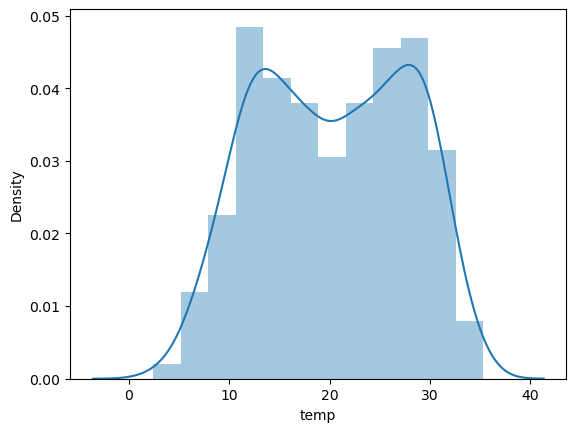

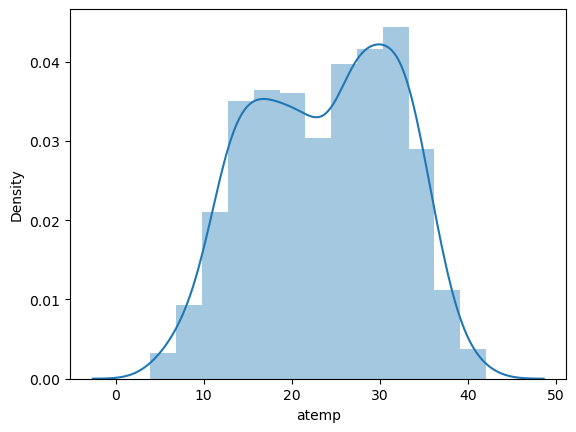

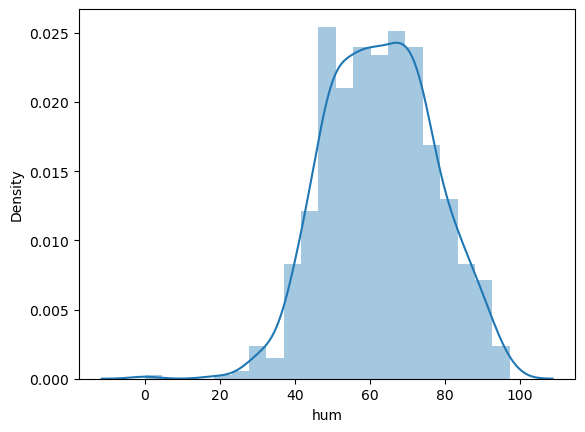

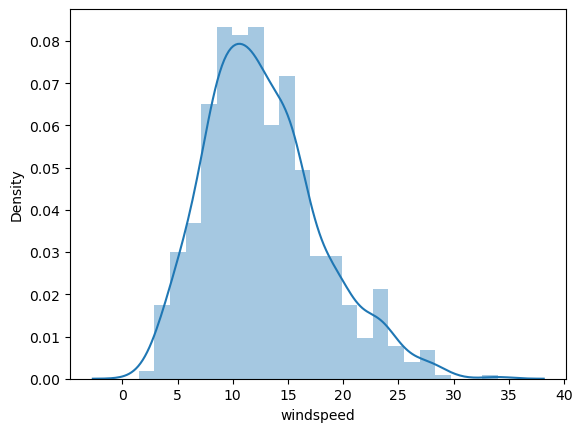

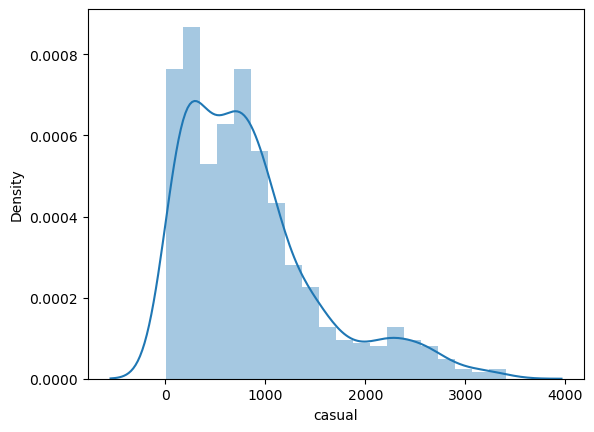

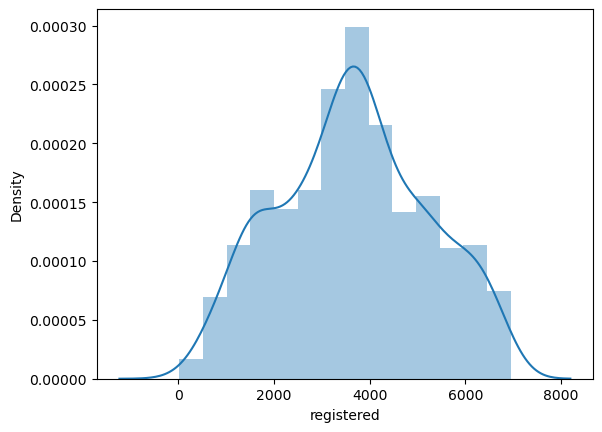

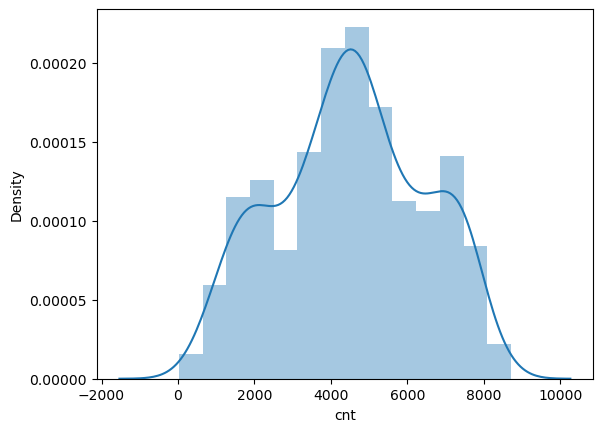

In [889]:
for col in numerical_columns:
    sns.distplot(bike_df[col])
    plt.show()

#### Analysis: Variable are normally distributed

### Lets check for Correlation between these numerical variables using Scatter plot

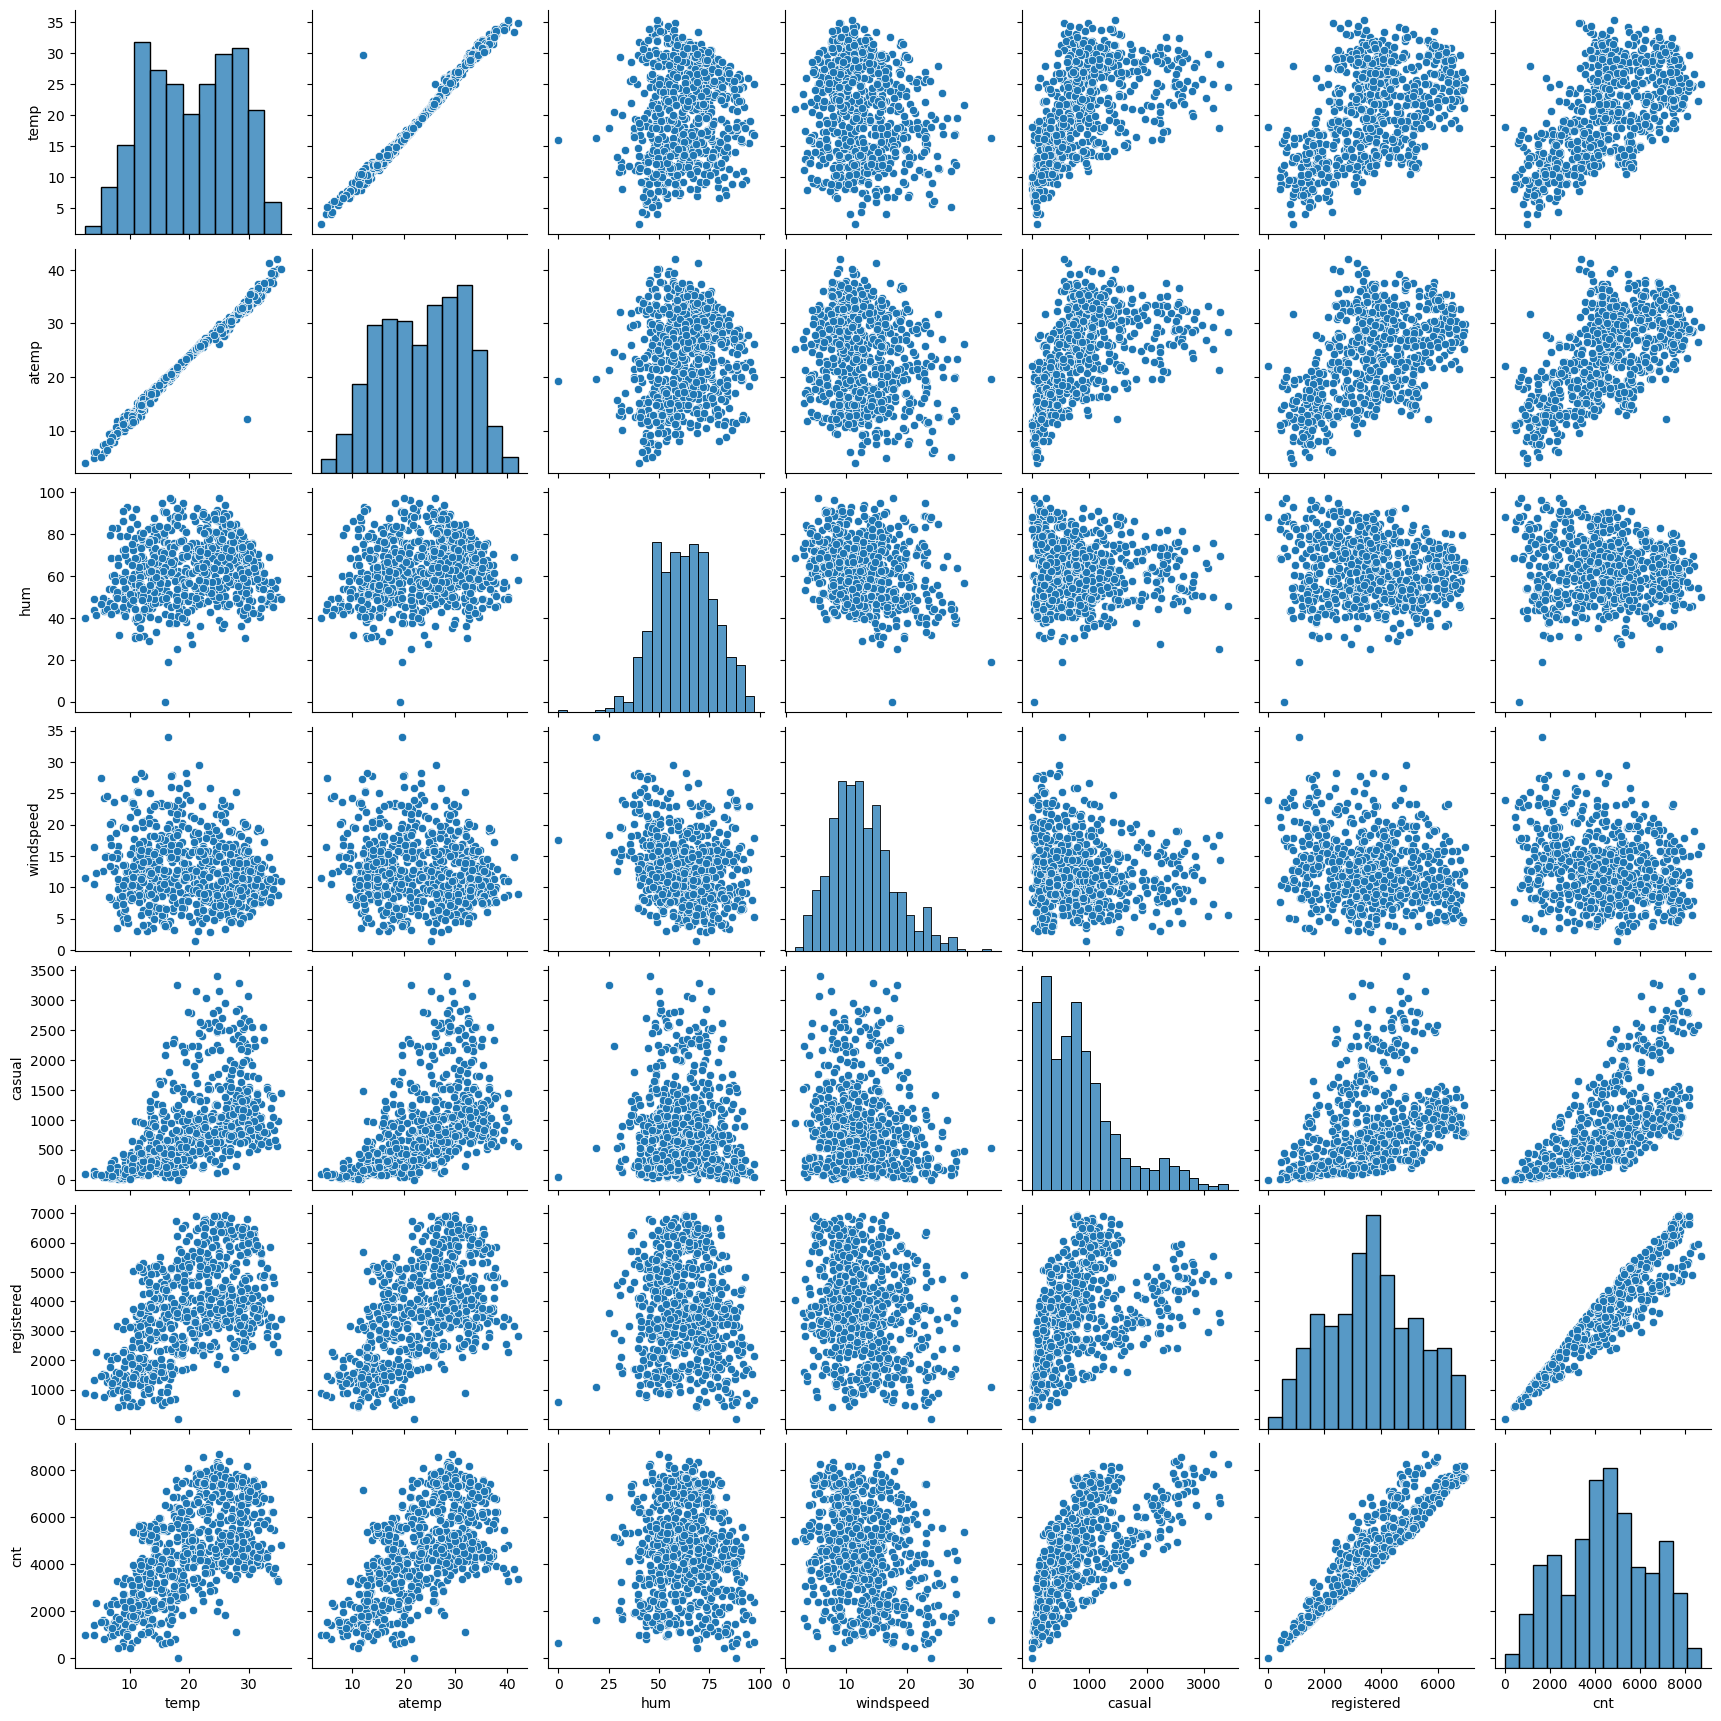

In [890]:
sns.pairplot(bike_df[numerical_columns])
plt.show()

### Lets check for Correlation between these numerical variables using heatmaps

In [891]:
corr = bike_df[numerical_columns].corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

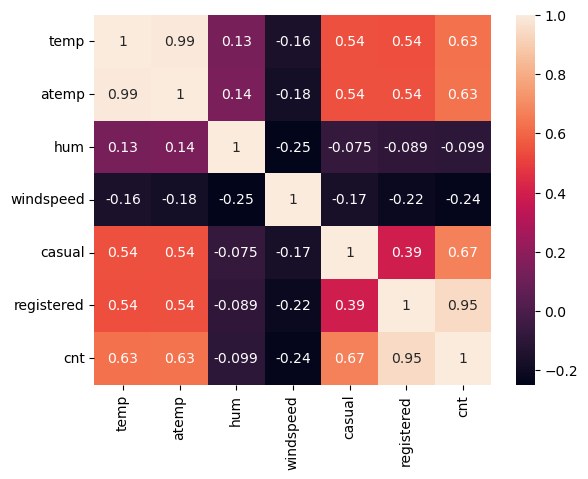

In [892]:
sns.heatmap(corr, annot=True)

#### Analysis: 
1. temp, atemp have a strong positive correlation with cnt
2. registered and casual are strongly and positively correlated with cnt, but this can be ignored as cnt is the sum of casual and registered.
3. windspeed has a weak negative correlation with cnt, if the windspeed increases, people preference for renting a bike decreases
4. Humidity has a very weak negative correlation with cnt
5. temp and atemp are highly correlated. 0.99 ,almost equal to 1, this shows Multicollinearity


## Section 4: Data Cleanup
1. drop column dteday, we have the similar data in yr,mnth_name, weekday_name
2. Dropping atemp to avoid multicollinearity

In [893]:
bike_df.columns
dup=bike_df;

In [894]:
bike_df = bike_df.drop(['atemp','dteday'], axis=1,errors='ignore')


In [895]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       730 non-null    int64  
 1   yr            730 non-null    int64  
 2   holiday       730 non-null    int64  
 3   workingday    730 non-null    int64  
 4   temp          730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   casual        730 non-null    int64  
 8   registered    730 non-null    int64  
 9   cnt           730 non-null    int64  
 10  season_name   730 non-null    object 
 11  mnth_name     730 non-null    object 
 12  weather       730 non-null    object 
 13  weekday_name  730 non-null    object 
dtypes: float64(3), int64(7), object(4)
memory usage: 80.0+ KB


## Section 5: Data Visualisation of Categorical variables

### Sub section 5.1 Box plot to see how cnt value changes for differnt values of categorical columns

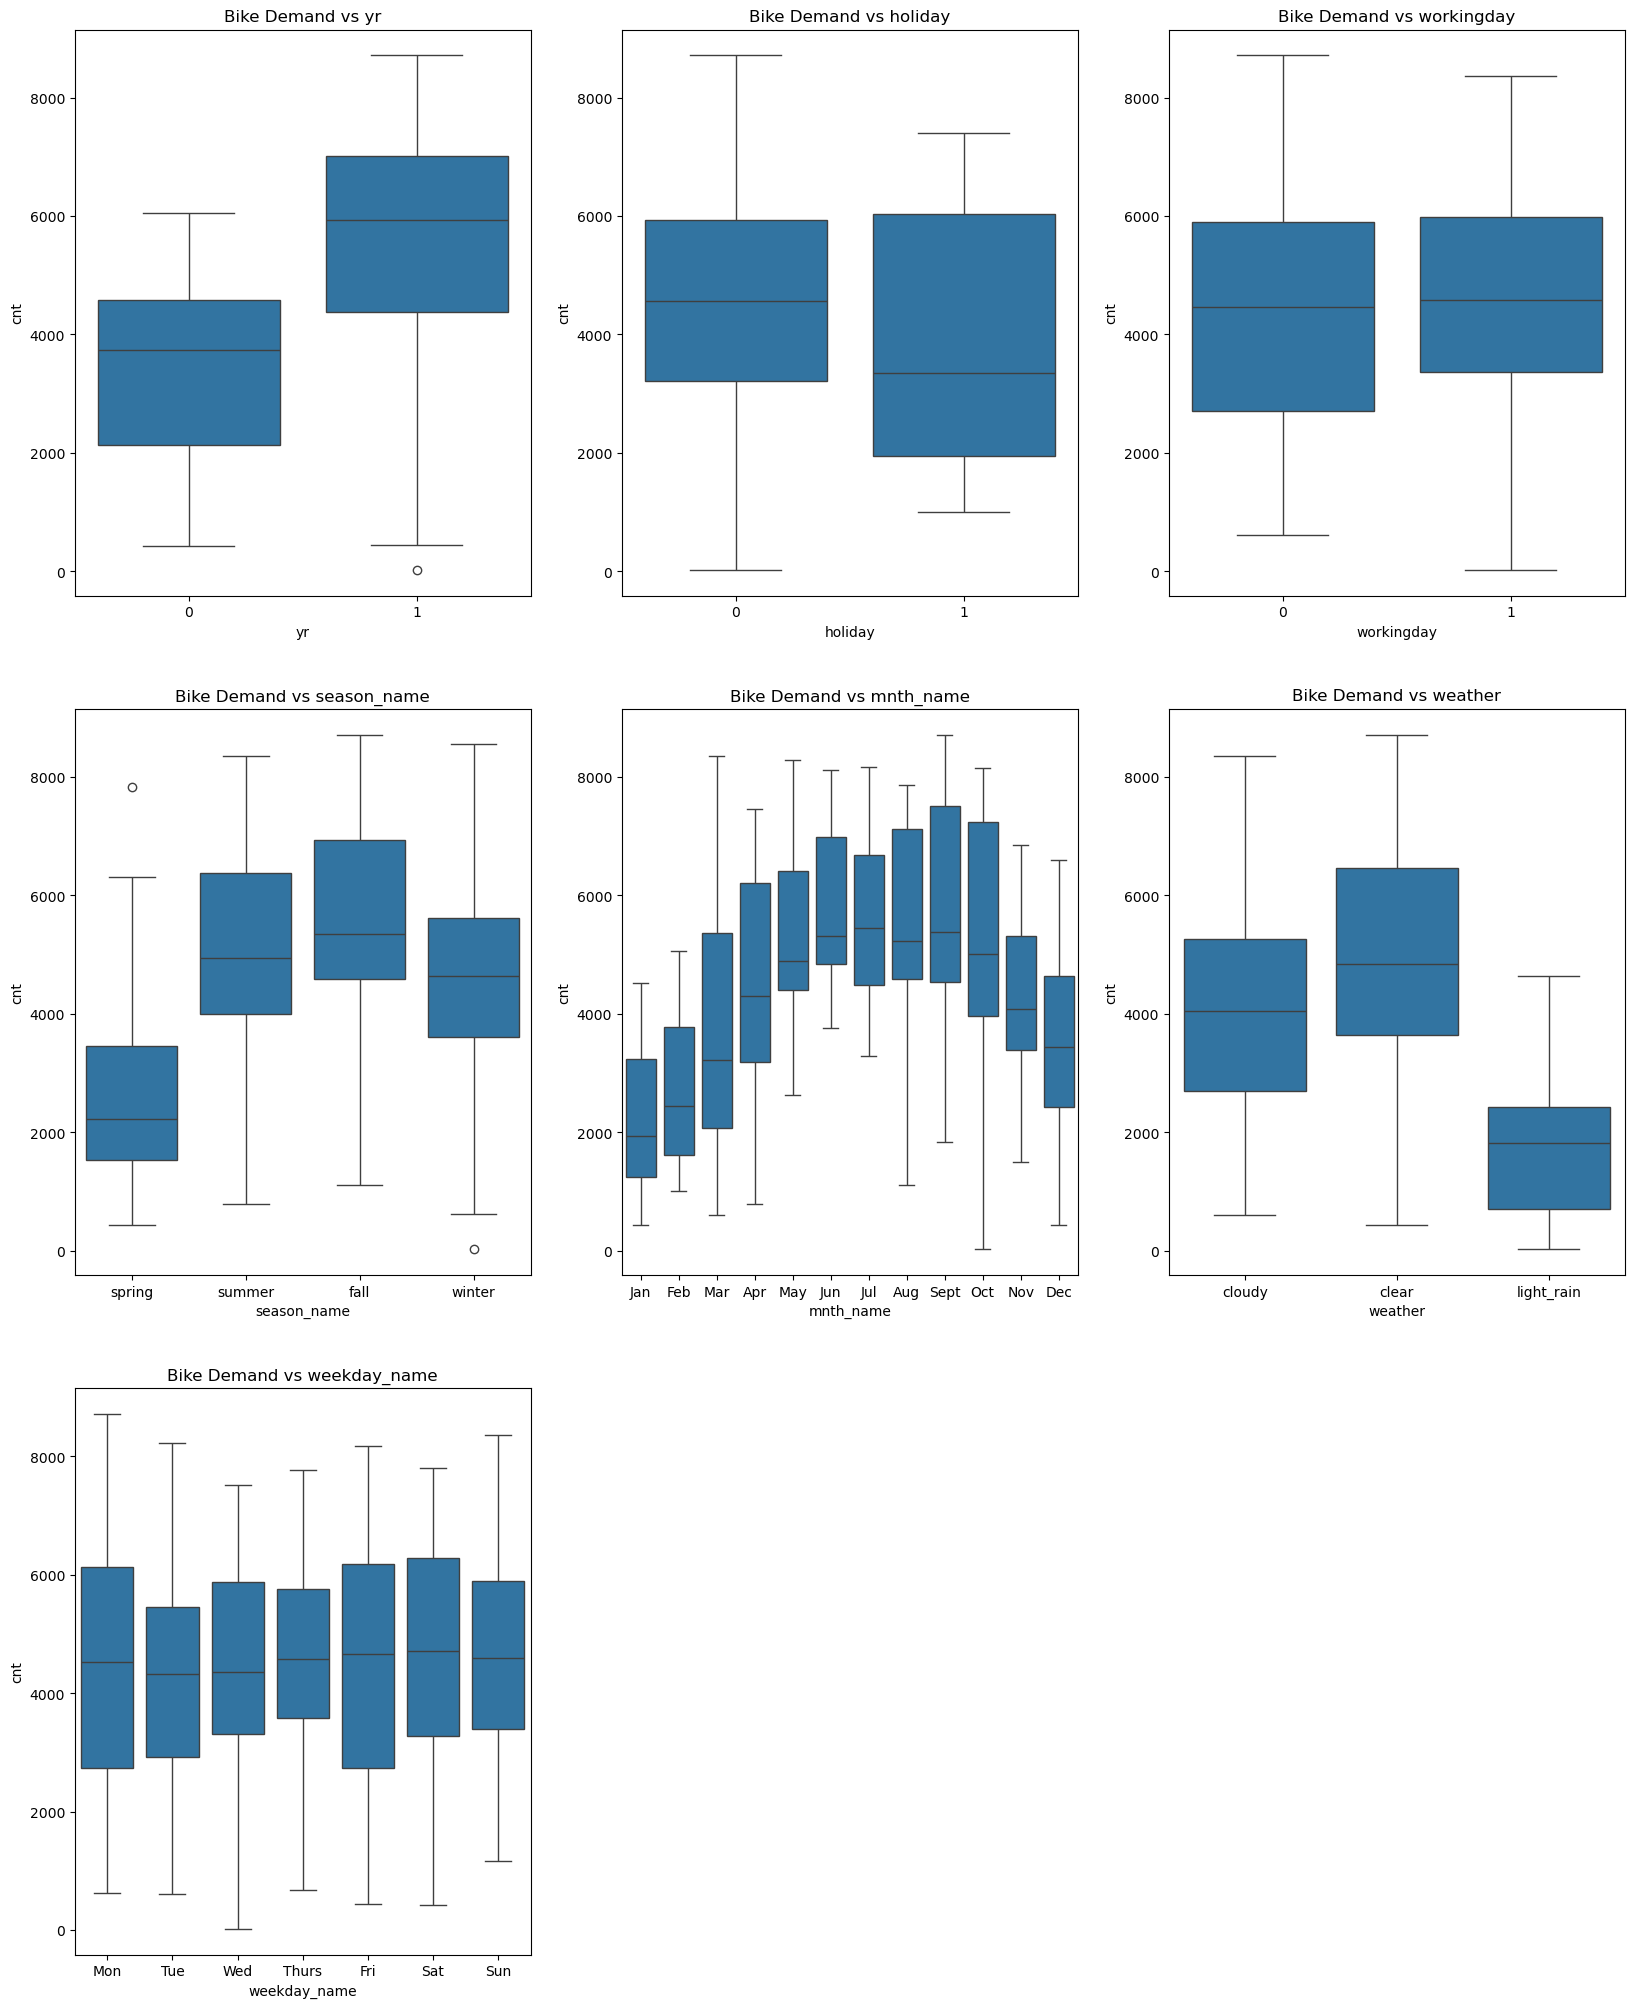

In [896]:
plt.figure(figsize= (20,25))
for i , col in enumerate(categorical_columns, 1):
    plt.subplot(3,3, i)
    sns.boxplot(x= col, y= 'cnt', data=bike_df)
    plt.title(f'Bike Demand vs {col}')
plt.show()

In [897]:
bike_df[categorical_columns].describe()

,yr,holiday,workingday
count,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562
std,0.500343,0.167266,0.465405
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [898]:
for col in categorical_columns:
    print(bike_df.groupby(col)['cnt'].mean().sort_values(), '\n')

yr
0    3405.761644
1    5610.252055
Name: cnt, dtype: float64 

holiday
1    3735.00000
0    4530.90268
Name: cnt, dtype: float64 

workingday
0    4330.168831
1    4590.332665
Name: cnt, dtype: float64 

season_name
spring    2608.411111
winter    4728.162921
summer    4992.331522
fall      5644.303191
Name: cnt, dtype: float64 

mnth_name
Jan     2176.338710
Feb     2669.964286
Dec     3403.806452
Mar     3692.258065
Nov     4247.183333
Apr     4484.900000
Oct     5199.225806
May     5349.774194
Jul     5563.677419
Aug     5664.419355
Sept    5766.516667
Jun     5772.366667
Name: cnt, dtype: float64 

weather
light_rain    1803.285714
cloudy        4044.813008
clear         4876.786177
Name: cnt, dtype: float64 

weekday_name
Tue      4228.828571
Wed      4338.123810
Thurs    4510.663462
Mon      4550.542857
Fri      4574.893204
Sat      4667.259615
Sun      4690.288462
Name: cnt, dtype: float64 



### Sub section 5.2 : Convert Categorical columns to numerical values
'yr', 'holiday','workingday' already have numerical values

'season_name', 'mnth_name', 'weather', 'weekday_name' need to be converted using Dummy values


In [899]:
cat_var = ['season_name', 'mnth_name', 'weather', 'weekday_name' ]
bike_cat = bike_df[cat_var]
bike_cat.head()

,season_name,mnth_name,weather,weekday_name
0,spring,Jan,cloudy,Mon
1,spring,Jan,cloudy,Tue
2,spring,Jan,clear,Wed
3,spring,Jan,clear,Thurs
4,spring,Jan,clear,Fri


In [900]:
bike_dummy = pd.get_dummies(bike_cat, drop_first = True).astype(int)
bike_dummy.head()

,season_name_spring,season_name_summer,season_name_winter,mnth_name_Aug,mnth_name_Dec,mnth_name_Feb,mnth_name_Jan,mnth_name_Jul,mnth_name_Jun,mnth_name_Mar,...,mnth_name_Oct,mnth_name_Sept,weather_cloudy,weather_light_rain,weekday_name_Mon,weekday_name_Sat,weekday_name_Sun,weekday_name_Thurs,weekday_name_Tue,weekday_name_Wed
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [901]:
#join orignal DF and dummy variable DF
bike_df = pd.concat([bike_dummy, bike_df], axis =1)

In [902]:
bike_df.head()

,season_name_spring,season_name_summer,season_name_winter,mnth_name_Aug,mnth_name_Dec,mnth_name_Feb,mnth_name_Jan,mnth_name_Jul,mnth_name_Jun,mnth_name_Mar,...,temp,hum,windspeed,casual,registered,cnt,season_name,mnth_name,weather,weekday_name
0,1,0,0,0,0,0,1,0,0,0,...,14.110847,80.5833,10.749882,331,654,985,spring,Jan,cloudy,Mon
1,1,0,0,0,0,0,1,0,0,0,...,14.902598,69.6087,16.652113,131,670,801,spring,Jan,cloudy,Tue
2,1,0,0,0,0,0,1,0,0,0,...,8.050924,43.7273,16.636703,120,1229,1349,spring,Jan,clear,Wed
3,1,0,0,0,0,0,1,0,0,0,...,8.200000,59.0435,10.739832,108,1454,1562,spring,Jan,clear,Thurs
4,1,0,0,0,0,0,1,0,0,0,...,9.305237,43.6957,12.522300,82,1518,1600,spring,Jan,clear,Fri


In [903]:
# drop orignal categorical columns
bike_df.drop(cat_var, axis=1, inplace =True)
bike_df.columns

Index(['season_name_spring', 'season_name_summer', 'season_name_winter',
       'mnth_name_Aug', 'mnth_name_Dec', 'mnth_name_Feb', 'mnth_name_Jan',
       'mnth_name_Jul', 'mnth_name_Jun', 'mnth_name_Mar', 'mnth_name_May',
       'mnth_name_Nov', 'mnth_name_Oct', 'mnth_name_Sept', 'weather_cloudy',
       'weather_light_rain', 'weekday_name_Mon', 'weekday_name_Sat',
       'weekday_name_Sun', 'weekday_name_Thurs', 'weekday_name_Tue',
       'weekday_name_Wed', 'instant', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

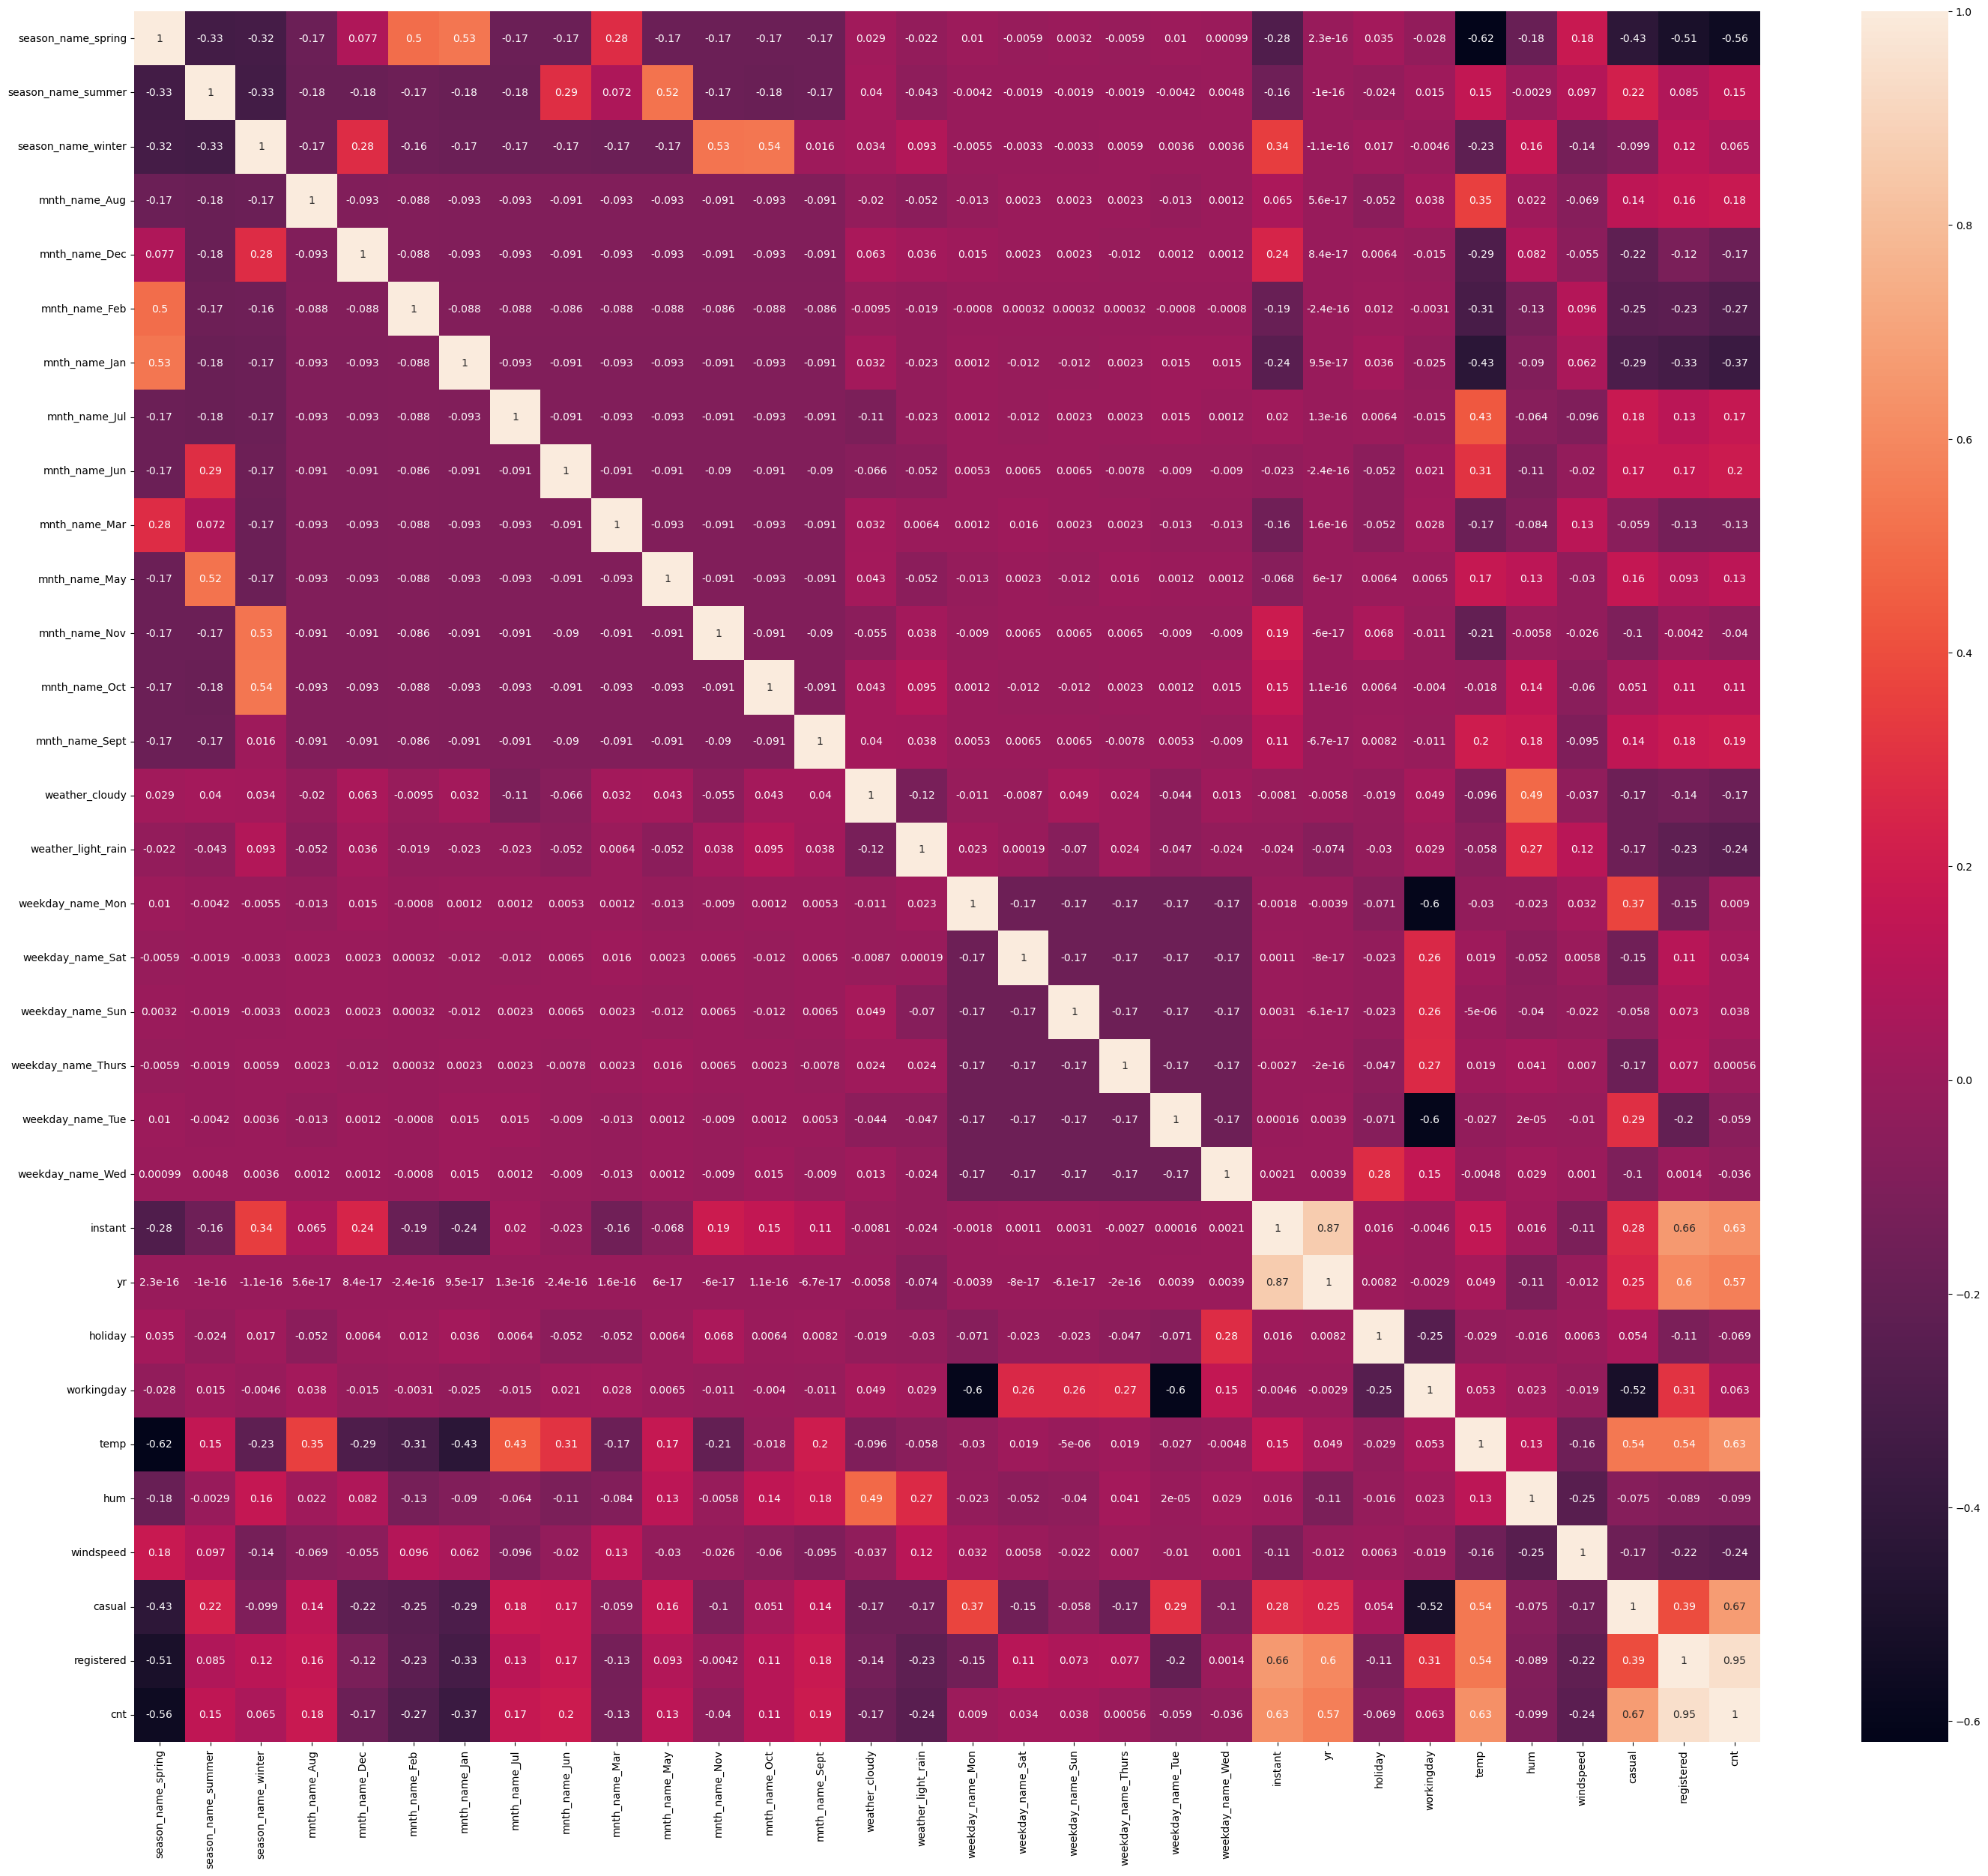

In [904]:
plt.figure(figsize = (35,30))
corr_cat = bike_df.corr()
sns.heatmap(corr_cat, annot = True)
plt.show()


#### Analysis : 
1. temp corr with cnt is 0.63 (high positive impact)
2. Another variable we see is yr, corr =0.57 (high positive impact) We can see from the data that every passing year their sale increased.

## Section 6: Test and Train set Data Preparation 

In [1012]:
np.random.seed(0)
bike_df_train , bike_df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [906]:
bike_df_train.describe()

,season_name_spring,season_name_summer,season_name_winter,mnth_name_Aug,mnth_name_Dec,mnth_name_Feb,mnth_name_Jan,mnth_name_Jul,mnth_name_Jun,mnth_name_Mar,...,instant,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,368.941176,0.507843,0.025490,0.676471,20.102429,63.112926,12.831318,837.543137,3648.839216,4486.382353
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,209.868619,0.500429,0.157763,0.468282,7.431169,14.156632,5.291832,675.921998,1580.336986,1952.158739
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,187.250000,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,311.000000,2468.250000,3120.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,373.000000,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,700.000000,3657.000000,4530.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,553.750000,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,1076.250000,4841.000000,5973.500000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,729.000000,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,3283.000000,6946.000000,8714.000000


In [907]:
bike_df_test.describe()

,season_name_spring,season_name_summer,season_name_winter,mnth_name_Aug,mnth_name_Dec,mnth_name_Feb,mnth_name_Jan,mnth_name_Jul,mnth_name_Jun,mnth_name_Mar,...,instant,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,356.776256,0.479452,0.036530,0.698630,20.815737,61.961883,12.600130,875.968037,3671.013699,4546.981735
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,213.665198,0.500722,0.188034,0.459904,7.689600,14.456669,4.984858,712.783588,1509.322560,1898.633630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,0.000000,0.000000,3.957390,25.416700,1.500244,9.000000,432.000000,441.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,171.000000,0.000000,0.000000,0.000000,14.093750,51.166700,9.021282,336.500000,2507.500000,3303.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,349.000000,0.000000,0.000000,1.000000,20.807500,60.916700,12.167200,736.000000,3667.000000,4579.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,537.500000,1.000000,0.000000,1.000000,27.401653,72.192050,15.395629,1190.000000,4624.000000,5869.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,730.000000,1.000000,1.000000,1.000000,34.815847,97.250000,27.999836,3410.000000,6844.000000,8395.000000


#### Numerical columns like temp hum windspeed, we see that they have very differnt values. Lets Scale the train set

In [908]:
scale_num = ['temp', 'hum', 'windspeed', 'registered' , 'cnt']
scale = MinMaxScaler()
bike_df_train[scale_num] = scale.fit_transform(bike_df_train[scale_num])

In [909]:
bike_df_train.describe()

,season_name_spring,season_name_summer,season_name_winter,mnth_name_Aug,mnth_name_Dec,mnth_name_Feb,mnth_name_Jan,mnth_name_Jul,mnth_name_Jun,mnth_name_Mar,...,instant,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,368.941176,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,837.543137,0.523944,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,209.868619,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,675.921998,0.228175,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,187.250000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,311.000000,0.353487,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,373.000000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,700.000000,0.525123,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,553.750000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,1076.250000,0.696073,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,1.000000,1.000000


#### Create Training datasets X y

In [910]:
ytrain = bike_df_train.pop('cnt')

In [911]:
ytrain.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [912]:
Xtrain = bike_df_train

In [913]:
Xtrain.head()

,season_name_spring,season_name_summer,season_name_winter,mnth_name_Aug,mnth_name_Dec,mnth_name_Feb,mnth_name_Jan,mnth_name_Jul,mnth_name_Jun,mnth_name_Mar,...,weekday_name_Wed,instant,yr,holiday,workingday,temp,hum,windspeed,casual,registered
653,0,0,1,0,0,0,0,0,0,0,...,0,654,1,0,1,0.509887,0.575354,0.300794,922,0.951776
576,0,0,0,0,0,0,0,1,0,0,...,0,577,1,0,1,0.815169,0.725633,0.264686,968,0.899220
426,1,0,0,0,0,0,0,0,0,1,...,0,427,1,0,0,0.442393,0.640189,0.255342,956,0.446145
728,1,0,0,0,1,0,0,0,0,0,...,0,729,1,0,0,0.245101,0.498067,0.663106,364,0.203869
482,0,1,0,0,0,0,0,0,0,0,...,0,483,1,0,0,0.395666,0.504508,0.188475,1120,0.444701


We will now drop casual and registered, as there purpose is served by scaling and considering them with Cnt, but causal + registration = cnt

In [914]:
Xtrain = bike_df_train.drop(["casual","registered"],axis=1) 

#### Add constants for train set

In [915]:
Xtrain_con = sm.add_constant(Xtrain)

In [916]:
Xtrain_con

,const,season_name_spring,season_name_summer,season_name_winter,mnth_name_Aug,mnth_name_Dec,mnth_name_Feb,mnth_name_Jan,mnth_name_Jul,mnth_name_Jun,...,weekday_name_Thurs,weekday_name_Tue,weekday_name_Wed,instant,yr,holiday,workingday,temp,hum,windspeed
653,1.0,0,0,1,0,0,0,0,0,0,...,1,0,0,654,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,0,0,0,1,0,...,1,0,0,577,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,427,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,1,0,0,0,0,...,0,1,0,729,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,0,0,0,...,0,0,0,483,1,0,0,0.395666,0.504508,0.188475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0,1,0,0,0,0,0,0,1,...,0,0,1,527,1,0,1,0.824514,0.605840,0.355596
578,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,579,1,0,1,0.863973,0.679690,0.187140
53,1.0,1,0,0,0,0,1,0,0,0,...,0,0,0,54,0,0,1,0.202618,0.435939,0.111379
350,1.0,0,0,1,0,1,0,0,0,0,...,0,0,0,351,0,0,0,0.248216,0.577930,0.431816


## Section 7: Create the Model

In [917]:
model = sm.OLS(ytrain, Xtrain_con).fit()

In [918]:
model.params

const                 0.255104
season_name_spring   -0.048732
season_name_summer    0.038818
season_name_winter    0.105196
mnth_name_Aug         0.032944
mnth_name_Dec        -0.008649
mnth_name_Feb        -0.040640
mnth_name_Jan        -0.075557
mnth_name_Jul        -0.026486
mnth_name_Jun         0.006417
mnth_name_Mar        -0.003170
mnth_name_May         0.028337
mnth_name_Nov        -0.009120
mnth_name_Oct         0.035929
mnth_name_Sept        0.104016
weather_cloudy       -0.061410
weather_light_rain   -0.257756
weekday_name_Mon      0.101614
weekday_name_Sat     -0.003843
weekday_name_Sun      0.005457
weekday_name_Thurs   -0.013482
weekday_name_Tue      0.046983
weekday_name_Wed     -0.015451
instant              -0.000149
yr                    0.286598
holiday               0.009746
workingday            0.096761
temp                  0.450164
hum                  -0.150488
windspeed            -0.186148
dtype: float64

In [919]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.95
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          8.52e-181
Time:                        23:31:51   Log-Likelihood:                 528.01
No. Observations:                 510   AIC:                            -998.0
Df Residuals:                     481   BIC:                            -875.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2551      0.051      5.006      0.000       0.155       0.355
season_name_spring    -0.0487      0.030     -1.622      0.105      -0.108       0.010
season_name_summer     0.0388      0.026      1.480      0.139      -0.013       0.090
season_name_winter     0.1052      0.028      3.758      0.000       0.050       0.160
mnth_name_Aug          0.0329      0.065      0.506      0.613      -0.095       0.161
mnth_name_Dec         -0.0086      0.116     -0.075      0.941      -0.237       0.219
mnth_name_Feb         -0.0406      0.041     -0.982      0.327      -0.122       0.041
mnth_name_Jan         -0.0756      0.051     -1.481      0.139      -0.176       0.025
mnth_name_Jul         -0.0265      0.054     -0.486      0.627      -0.134       0.081
mnth_name_Jun          0.0064      0.038      0.170      0.865      -0.068       0.081
mnth_name_Mar         -0.0032      0.028     -0.115      0.909      -0.057       0.051
mnth_name_May          0.0283      0.025      1.141      0.254      -0.020       0.077
mnth_name_Nov         -0.0091      0.105     -0.087      0.931      -0.215       0.197
mnth_name_Oct          0.0359      0.093      0.388      0.698      -0.146       0.218
mnth_name_Sept         0.1040      0.076      1.368      0.172      -0.045       0.253
weather_cloudy        -0.0614      0.010     -5.853      0.000      -0.082      -0.041
weather_light_rain    -0.2578      0.026     -9.775      0.000      -0.310      -0.206
weekday_name_Mon       0.1016      0.016      6.210      0.000       0.069       0.134
weekday_name_Sat      -0.0038      0.015     -0.262      0.793      -0.033       0.025
weekday_name_Sun       0.0055      0.015      0.366      0.714      -0.024       0.035
weekday_name_Thurs    -0.0135      0.015     -0.915      0.361      -0.042       0.015
weekday_name_Tue       0.0470      0.016      2.871      0.004       0.015       0.079
weekday_name_Wed      -0.0155      0.015     -1.059      0.290      -0.044       0.013
instant               -0.0001      0.000     -0.333      0.739      -0.001       0.001
yr                     0.2866      0.164      1.748      0.081      -0.036       0.609
holiday                0.0097      0.026      0.377      0.707      -0.041       0.061
workingday             0.0968      0.015      6.347      0.000       0.067       0.127
temp                   0.4502      0.046      9.713      0.000       0.359       0.541
hum                   -0.1505      0.039     -3.899      0.000      -0.226      -0.075
windspeed             -0.1861      0.026     -7.234      0.000      -0.237      -0.136
==============================================================================
Omnibus:                       83.239   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [920]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

LinearRegression()

In [921]:
print(lm.coef_)
print(lm.intercept_)

[-4.87315433e-02  3.88178096e-02  1.05195936e-01  3.29439419e-02
 -8.64865972e-03 -4.06399693e-02 -7.55574509e-02 -2.64856298e-02
  6.41655632e-03 -3.16991823e-03  2.83367400e-02 -9.12019679e-03
  3.59289299e-02  1.04016297e-01 -6.14102917e-02 -2.57756245e-01
  3.78384259e-02 -3.84279916e-03  5.45663531e-03 -1.34818946e-02
 -1.67933057e-02 -1.54513486e-02 -1.49147144e-04  2.86598356e-01
 -5.40302566e-02  3.29851363e-02  4.50163587e-01 -1.50488265e-01
 -1.86148446e-01]
0.31887948766841173


#### Analysis: Rsq value is .853 i.e accurany of our model is 85.3 %

## Section 8: Feature Elimination
 We are now done with basic model building. We built our model with 28 columns or features. lets try to only keep releavnt fetaures with minimum reduction is Rsq value

In [922]:
lm2 = LinearRegression()
rfe1 = RFE(estimator=lm2, n_features_to_select=20)

In [923]:
rfe1.fit(Xtrain, ytrain)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [924]:
Xtrain.columns[rfe1.support_]

Index(['season_name_spring', 'season_name_summer', 'season_name_winter',
       'mnth_name_Aug', 'mnth_name_Dec', 'mnth_name_Feb', 'mnth_name_Jan',
       'mnth_name_Jul', 'mnth_name_May', 'mnth_name_Nov', 'mnth_name_Sept',
       'weather_cloudy', 'weather_light_rain', 'weekday_name_Mon', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [925]:
Xtrain_20 = Xtrain[Xtrain.columns[rfe1.support_]] 

In [926]:
Xtrain_20.head()

,season_name_spring,season_name_summer,season_name_winter,mnth_name_Aug,mnth_name_Dec,mnth_name_Feb,mnth_name_Jan,mnth_name_Jul,mnth_name_May,mnth_name_Nov,mnth_name_Sept,weather_cloudy,weather_light_rain,weekday_name_Mon,yr,holiday,workingday,temp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475


### Sub section 8.1 : Build the model again with 20 features

In [927]:
Xtrain_20_cons = sm.add_constant(Xtrain_20)

In [928]:
Xtrain_20_cons.head()

,const,season_name_spring,season_name_summer,season_name_winter,mnth_name_Aug,mnth_name_Dec,mnth_name_Feb,mnth_name_Jan,mnth_name_Jul,mnth_name_May,...,mnth_name_Sept,weather_cloudy,weather_light_rain,weekday_name_Mon,yr,holiday,workingday,temp,hum,windspeed
653,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0.395666,0.504508,0.188475


In [929]:
# Fitting the model with 15 variables
lm1 = sm.OLS(ytrain, Xtrain_20_cons).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.2
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          1.62e-188
Time:                        23:31:51   Log-Likelihood:                 526.45
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -922.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2904      0

#### Check for VIF values of each variable selected

In [930]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = Xtrain_20_cons.drop('const',axis=1)



In [931]:
vif = pd.DataFrame()
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,hum,33.37
17,temp,22.20
0,season_name_spring,7.44
2,season_name_winter,5.99
1,season_name_summer,5.89
16,workingday,5.45
19,windspeed,4.94
3,mnth_name_Aug,3.15
7,mnth_name_Jul,2.78
6,mnth_name_Jan,2.42


#### Analysis on dropping 8 variables, the Rsq variable also dropped by ~0.1%.(from 85 to 85.2 ) Which is insignificant. Our model is still in a very good shape
####  VIF is high for many variables(>5) lets continue to reduce varibales

### Sub section 8.2:  Reduce to 10 features

In [932]:
rfe2 = RFE(estimator = lm2, n_features_to_select = 10)

In [933]:
rfe2.fit(Xtrain, ytrain)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [934]:
Xtrain_10 = Xtrain[Xtrain.columns[rfe2.support_]]
Xtrain_10.head()

,season_name_spring,season_name_winter,mnth_name_Jul,mnth_name_Sept,weather_light_rain,yr,holiday,temp,hum,windspeed
653,0,1,0,0,0,1,0,0.509887,0.575354,0.300794
576,0,0,1,0,0,1,0,0.815169,0.725633,0.264686
426,1,0,0,0,0,1,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,0,0,0,0,0,1,0,0.395666,0.504508,0.188475


In [935]:
Xtrain_10_cons = sm.add_constant(Xtrain_10)

In [936]:
Xtrain_10_cons.head()

,const,season_name_spring,season_name_winter,mnth_name_Jul,mnth_name_Sept,weather_light_rain,yr,holiday,temp,hum,windspeed
653,1.0,0,1,0,0,0,1,0,0.509887,0.575354,0.300794
576,1.0,0,0,1,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,1,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,0,0,0,0,0,1,0,0.395666,0.504508,0.188475


In [937]:
model3 = sm.OLS(ytrain, Xtrain_10_cons).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          1.53e-184
Time:                        23:31:52   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3769      0.031     12.133      0.000       0.316       0.438
season_name_spring    -0.1005      0.015     -6.536      0.000      -0.131      -0.070
season_name_winter     0.0653      0.013      5.153      0.000       0.040       0.090
mnth_name_Jul         -0.0805      0.018     -4.538      0.000      -0.115      -0.046
mnth_name_Sept         0.0598      0.016      3.723      0.000       0.028       0.091
weather_light_rain    -0.1980      0.026     -7.659      0.000      -0.249      -0.147
yr                     0.2281      0.008     27.102      0.000       0.212       0.245
holiday               -0.0920      0.026     -3.472      0.001      -0.144      -0.040
temp                   0.5147      0.031     16.542      0.000       0.454       0.576
hum                   -0.2728      0.032     -8.542      0.000      -0.336      -0.210
windspeed             -0.1887      0.026     -7.194      0.000      -0.240      -0.137
==============================================================================
Omnibus:                       51.023   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.492
Skew:                          -0.593   Prob(JB):                     1.51e-22
Kurtosis:                       4.823   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Analysis on dropping 10 more variables, the Rsq variable also dropped by 2.2%.(from 85.2 to 83 ) Which is very good progress. Our model is still in a very good shape. With very less features now we have a high accuracy model

### Sub section 8.3:  Reduce to 5 features

In [938]:
rfe3 = RFE(estimator = lm2, n_features_to_select=5)
rfe3.fit(Xtrain, ytrain)
Xtrain_5 = Xtrain[Xtrain.columns[rfe3.support_]]
Xtrain_5.head()

,weather_light_rain,yr,temp,hum,windspeed
653,0,1,0.509887,0.575354,0.300794
576,0,1,0.815169,0.725633,0.264686
426,0,1,0.442393,0.640189,0.255342
728,0,1,0.245101,0.498067,0.663106
482,0,1,0.395666,0.504508,0.188475


In [939]:
Xtrain_5_cons = sm.add_constant(Xtrain_5)
model4 = sm.OLS(ytrain, Xtrain_5_cons).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     301.4
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          7.13e-149
Time:                        23:31:52   Log-Likelihood:                 391.37
No. Observations:                 510   AIC:                            -770.7
Df Residuals:                     504   BIC:                            -745.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2850      0.031      9.079      0.000       0.223       0.347
weather_light_rain    -0.1749      0.031     -5.637      0.000      -0.236      -0.114
yr                     0.2298      0.010     22.698      0.000       0.210       0.250
temp                   0.5678      0.023     24.781      0.000       0.523       0.613
hum                   -0.1807      0.038     -4.815      0.000      -0.254      -0.107
windspeed             -0.2197      0.031     -7.010      0.000      -0.281      -0.158
==============================================================================
Omnibus:                        8.111   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.147
Skew:                          -0.267   Prob(JB):                       0.0170
Kurtosis:                       3.313   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Analysis: removing 5 more varibales Rsq reduced too much, from ~83% to ~75%

### Sub section 8.4 : try with 6 variables

In [940]:
rfe4 = RFE(estimator = lm2, n_features_to_select=6)
rfe4.fit(Xtrain, ytrain)
Xtrain_6 = Xtrain[Xtrain.columns[rfe4.support_]]
print(Xtrain_6.head())
Xtrain_6_cons = sm.add_constant(Xtrain_6)
model6 = sm.OLS(ytrain, Xtrain_6_cons).fit()
model6.summary()

     season_name_spring  weather_light_rain  yr      temp       hum  windspeed
653                   0                   0   1  0.509887  0.575354   0.300794
576                   0                   0   1  0.815169  0.725633   0.264686
426                   1                   0   1  0.442393  0.640189   0.255342
728                   1                   0   1  0.245101  0.498067   0.663106
482                   0                   0   1  0.395666  0.504508   0.188475


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     344.1
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          1.80e-174
Time:                        23:31:52   Log-Likelihood:                 454.22
No. Observations:                 510   AIC:                            -894.4
Df Residuals:                     503   BIC:                            -864.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4336      0.030     14.228      0.000       0.374       0.493
season_name_spring    -0.1558      0.013    -11.857      0.000      -0.182      -0.130
weather_light_rain    -0.1943      0.027     -7.066      0.000      -0.248      -0.140
yr                     0.2321      0.009     25.894      0.000       0.214       0.250
temp                   0.3939      0.025     15.741      0.000       0.345       0.443
hum                   -0.2185      0.033     -6.548      0.000      -0.284      -0.153
windspeed             -0.1988      0.028     -7.153      0.000      -0.253      -0.144
==============================================================================
Omnibus:                       49.933   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.763
Skew:                          -0.573   Prob(JB):                     1.32e-22
Kurtosis:                       4.851   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [941]:
data_6 = Xtrain_6_cons.drop("const", axis = 1)
vif6 = pd.DataFrame()
vif6['Features']=data_6.columns;
vif6['VIF']= [variance_inflation_factor(data_6.values, i) for i in range(data_6.shape[1])]
vif6.VIF = round(vif6.VIF,2)
vif6

,Features,VIF
0,season_name_spring,1.78
1,weather_light_rain,1.10
2,yr,2.03
3,temp,8.39
4,hum,9.73
5,windspeed,3.86


#### Analysis with 6 variables the Rsq is 80.4 which is very good number for accuracy as compared to 5 variables.

### Sub section 8.4 : try with 7 variables

In [942]:
rfe4 = RFE(estimator = lm2, n_features_to_select=7)
rfe4.fit(Xtrain, ytrain)
Xtrain_7 = Xtrain[Xtrain.columns[rfe4.support_]]
print(Xtrain_7.head())
Xtrain_7_cons = sm.add_constant(Xtrain_7)
model7 = sm.OLS(ytrain, Xtrain_7_cons).fit()
model7.summary()

     season_name_spring  mnth_name_Jul  weather_light_rain  yr      temp  \
653                   0              0                   0   1  0.509887   
576                   0              1                   0   1  0.815169   
426                   1              0                   0   1  0.442393   
728                   1              0                   0   1  0.245101   
482                   0              0                   0   1  0.395666   

          hum  windspeed  
653  0.575354   0.300794  
576  0.725633   0.264686  
426  0.640189   0.255342  
728  0.498067   0.663106  
482  0.504508   0.188475  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          2.34e-178
Time:                        23:31:53   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4277      0.030     14.348      0.000       0.369       0.486
season_name_spring    -0.1487      0.013    -11.498      0.000      -0.174      -0.123
mnth_name_Jul         -0.0901      0.018     -4.945      0.000      -0.126      -0.054
weather_light_rain    -0.1867      0.027     -6.933      0.000      -0.240      -0.134
yr                     0.2301      0.009     26.240      0.000       0.213       0.247
temp                   0.4480      0.027     16.720      0.000       0.395       0.501
hum                   -0.2412      0.033     -7.324      0.000      -0.306      -0.176
windspeed             -0.2066      0.027     -7.591      0.000      -0.260      -0.153
==============================================================================
Omnibus:                       45.817   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.848
Skew:                          -0.547   Prob(JB):                     8.40e-20
Kurtosis:                       4.714   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Analysis with 7 variables the Rsq is 81.3 which is very good,Good increase when compared to 6 varibles.(80.4)

#### Lets Calculate VIF again

In [943]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [944]:
data = Xtrain_7_cons.drop("const", axis = 1)
vif7 = pd.DataFrame()
vif7['Features']=data.columns;
vif7['VIF']= [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif7.VIF = round(vif7.VIF,2)
vif7

,Features,VIF
0,season_name_spring,1.80
1,mnth_name_Jul,1.35
2,weather_light_rain,1.11
3,yr,2.03
4,temp,10.37
5,hum,10.47
6,windspeed,3.89


#### Analysis : VIF is high for temp and hum throughout. Lets try to remove one variable and see what happens

In [945]:
Xtrain_for_vif = Xtrain_7.drop("hum", axis=1)

### Build the model again with 6 variables

In [983]:
Xtrain_for_vif = sm.add_constant(Xtrain_for_vif)
Xtrain_for_vif_cons =Xtrain_for_vif


In [984]:
model7new= sm.OLS(ytrain, Xtrain_for_vif).fit()
print(model7new.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          1.37e-168
Time:                        23:58:55   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2596      0

In [985]:
Xtrain_for_vif = Xtrain_for_vif.drop("const", axis=1)

In [986]:
vif_7 = pd.DataFrame()

In [987]:
vif_7["Features"] = Xtrain_for_vif.columns
vif_7['VIF'] = [variance_inflation_factor(Xtrain_for_vif.values, i) for i in range (Xtrain_for_vif.shape[1])]
vif_7

,Features,VIF
0,season_name_spring,1.494392
1,mnth_name_Jul,1.256583
2,weather_light_rain,1.044848
3,yr,2.026288
4,temp,3.945895
5,windspeed,3.719729


In [988]:
Final_cols = Xtrain_for_vif.columns

Final_cols

Index(['season_name_spring', 'mnth_name_Jul', 'weather_light_rain', 'yr',
       'temp', 'windspeed'],
      dtype='object')

## Section 9 : Predictions
Refering to Section 6
1. lets scale the variables bike_df_test
2. remove causal and registered varibles
3. Add constant

Then perform predictions. 

In [952]:
# Numerical variables that we scaled earlier
scale_num

['temp', 'hum', 'windspeed', 'registered', 'cnt']

In [1013]:
bike_df_test

,season_name_spring,season_name_summer,season_name_winter,mnth_name_Aug,mnth_name_Dec,mnth_name_Feb,mnth_name_Jan,mnth_name_Jul,mnth_name_Jun,mnth_name_Mar,...,instant,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
184,0,0,0,0,0,0,0,1,0,0,...,185,0,1,0,29.793347,63.7917,5.459106,3065,2978,6043
535,0,1,0,0,0,0,0,0,1,0,...,536,1,0,1,32.082500,59.2083,7.625404,872,5339,6211
299,0,0,1,0,0,0,0,0,0,0,...,300,0,0,1,19.270000,81.2917,13.250121,240,2419,2659
221,0,0,0,1,0,0,0,0,0,0,...,222,0,0,1,31.433347,42.4167,13.417286,884,3896,4780
152,0,1,0,0,0,0,0,0,1,0,...,153,0,0,1,29.315000,30.5000,19.583229,736,4232,4968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0,0,1,0,0,0,0,...,401,1,0,0,10.899153,68.7917,11.791732,318,2629,2947
702,0,0,1,0,1,0,0,0,0,0,...,703,1,0,1,19.509153,73.3750,11.666643,551,6055,6606
127,0,1,0,0,0,0,0,0,0,0,...,128,0,0,0,21.661653,63.1667,5.000712,1401,2932,4333
640,0,0,1,0,0,0,0,0,0,0,...,641,1,0,1,26.957500,79.3750,4.458569,728,6844,7572


In [1014]:
bike_df_test[scale_num]  = scale.transform(bike_df_test[scale_num])


In [1015]:
yTest = bike_df_test.pop('cnt')
XTest = bike_df_test.drop(["casual","registered"],axis=1)

In [1016]:
Final_cols = Xtrain_for_vif.columns

#### Reduce Xtest to only those coloumn with which we created out final modeL

In [1017]:
Xtest_for_vif = XTest[Xtrain_for_vif.columns]

In [1018]:
Xtest_for_vif.head()

,season_name_spring,mnth_name_Jul,weather_light_rain,yr,temp,windspeed
184,0,1,0,0,0.831783,0.084219
535,0,0,0,1,0.901354,0.153728
299,0,0,0,0,0.511964,0.334206
221,0,0,0,0,0.881625,0.339570
152,0,0,0,0,0.817246,0.537414


In [1019]:
# Add constant
Xtest_for_vif = sm.add_constant(Xtest_for_vif)

In [1020]:
yPred = model7new.predict(Xtest_for_vif)

yPred

Text(0, 0.5, 'yPred')

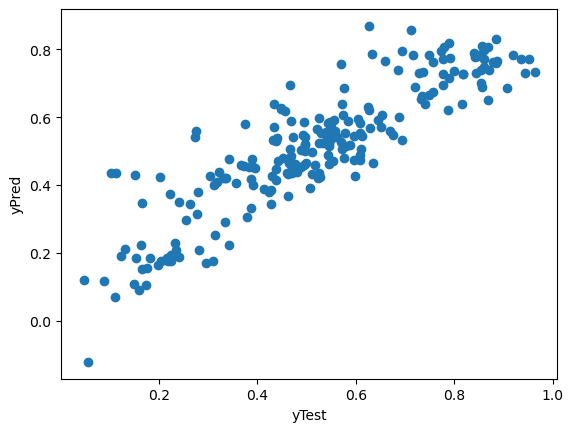

In [1031]:
# Plot a gragh using yPred and yTest
fig = plt.figure()
plt.scatter(yTest, yPred)
plt.xlabel('yTest')
plt.ylabel('yPred' ) 

## Section 10: Model Evaluation

In [1022]:
from sklearn.metrics import r2_score
r2_score(yTest, yPred)

0.7802124353228016

### Analysis : Our model had 79.3% rsq value with training data, With our test data rsq value is 78.02. Which is great!!

## Section 11 : Residual Analyis & check Correlation on orignal data

In [1027]:
yTrain_data = model7new.predict(Xtrain_for_vif_cons)

In [1028]:
yTrain_data

653    0.668006
576    0.732688
426    0.504787
728    0.358223
482    0.636241
         ...   
526    0.794297
578    0.836852
53     0.188111
350    0.300058
79     0.376885
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

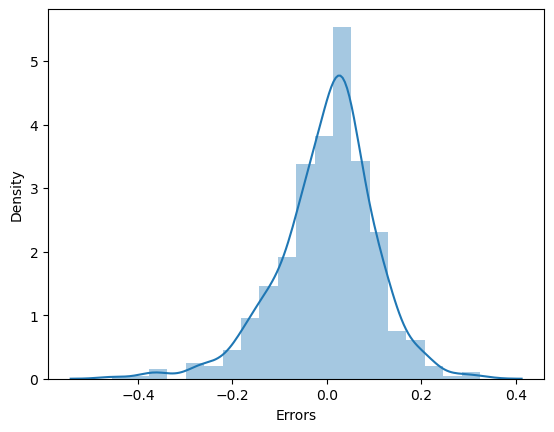

In [1029]:
fig = plt.figure()
sns.distplot((ytrain - yTrain_data), bins = 20)
plt.xlabel('Errors')                         

### Analysis: The error graph is Normal Distributed!

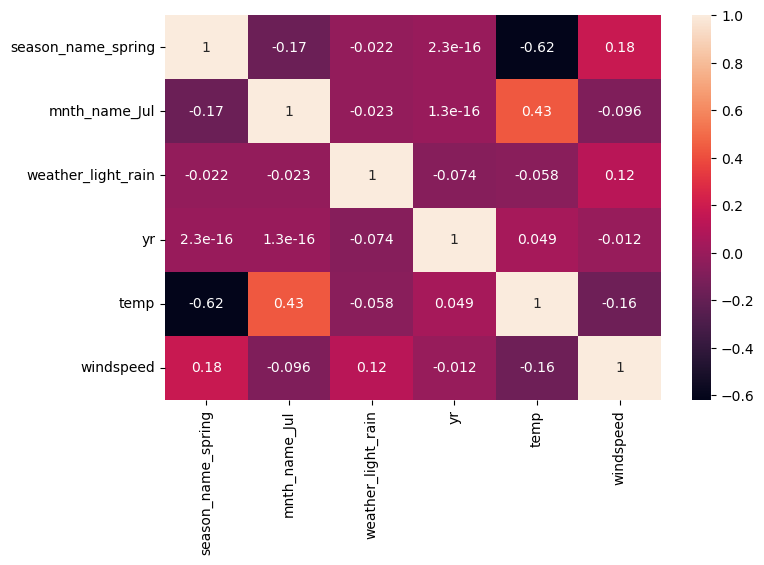

In [1032]:
# plot a graph just to double check correlation of variables
plt.figure(figsize=(8,5))
sns.heatmap(bike_df[Final_cols].corr(), annot=True)
plt.show()

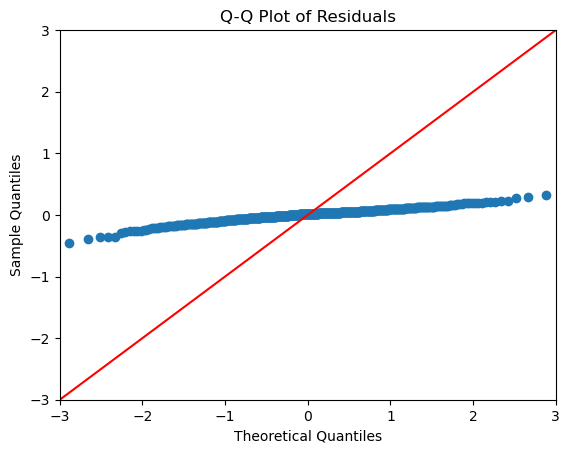

In [1034]:
sm.qqplot(ytrain - yTrain_data, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

## Final Analysis: 
1. We created a model with 6 variables.
2. the Rsq of Training and Test is almost same
3. 6 variables have a low corealation with each other
4. We created a model with 78-79% of variance. That means it explains most of the data and is a very good fit